In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

In [2]:
import folium

In [3]:
!pip install folium

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Files/STData_cleaned')

In [5]:
data.shape

(320, 63)

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

making a dependent coulumn

In [9]:
data.shape

(320, 63)

In [10]:
data['Accepted Offer'].value_counts()

1    176
0    144
Name: Accepted Offer, dtype: int64

'Accepted Offer' is our target column

finding corelations

In [11]:
data.columns

Index(['Unnamed: 0', 'Season Number', 'Season Start', 'Season End',
       'Episode Number', 'Episode Title', 'Pitch Number', 'Startup Name',
       'Industry', 'Business Description', 'Number of Presenters',
       'Male Presenters', 'Female Presenters', 'Transgender Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam Investment Equit

In [12]:
data_new = data.drop(columns = ['Season Start', 'Season End', 'Episode Title', 'Business Description', 'Season Number', 'Pitchers City', 'Unnamed: 0', 'Season Number',
                      'Episode Number', 'Pitch Number', 'Ashneer Investment Amount', 'Ashneer Investment Equity', 'Ashneer Debt Amount', 'Namita Investment Amount',
                      'Namita Investment Equity', 'Namita Debt Amount', 'Anupam Investment Amount', 'Anupam Investment Equity', 'Anupam Debt Amount', 'Vineeta Investment Amount',
                      'Vineeta Investment Equity', 'Vineeta Debt Amount', 'Aman Investment Amount', 'Aman Investment Equity', 'Aman Debt Amount', 'Peyush Investment Amount', 'Peyush Investment Equity',
                      'Peyush Debt Amount', 'Ghazal Investment Amount', 'Ghazal Investment Equity', 'Ghazal Debt Amount', 'Amit Investment Amount', 'Amit Investment Equity', 'Amit Debt Amount',
                      'Guest Investment Amount', 'Guest Investment Equity', 'Guest Debt Amount'])

In [13]:
data_new.shape

(320, 27)

<ipython-input-14-547bc11d29c3>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



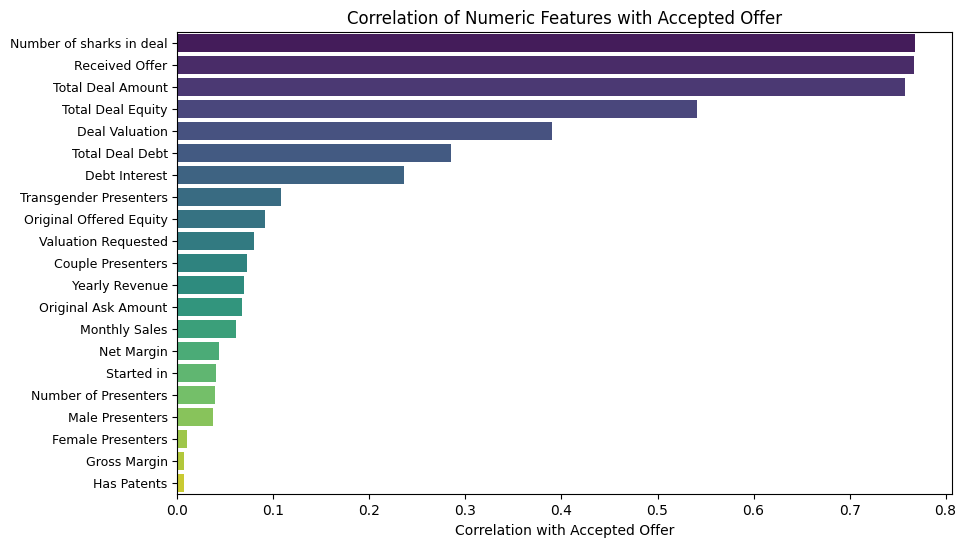

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation between "Accepted Offer" and other numeric columns
correlation_with_target = data_new.corr()['Accepted Offer'].drop('Accepted Offer')

# Sort the correlation values in descending order
correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)

# Create a bar plot to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.xlabel('Correlation with Accepted Offer')
plt.title('Correlation of Numeric Features with Accepted Offer')

# Rotate the y-axis labels (adjust the rotation angle as needed)
plt.yticks(size=9)  # Rotate the labels by 45 degrees

plt.show()

In [15]:
# Define a dictionary to map states to regions
state_to_region = {
    'Haryana': 'North',
    'Himachal Pradesh': 'North',
    'Jammu & Kashmir': 'North',
    'Punjab': 'North',
    'Rajasthan': 'North',
    'Delhi': 'North',
    'Chandigarh': 'North',
    'Chhattisgarh': 'Central',
    'Uttarakhand': 'Central',
    'Uttar Pradesh': 'Central',
    'Madhya Pradesh': 'Central',
    'Bihar': 'East',
    'Jharkhand': 'East',
    'Orissa': 'East',
    'West Bengal': 'East',
    'Assam': 'Northeast',
    'Arunachal Pradesh': 'Northeast',
    'Manipur': 'Northeast',
    'Tripura': 'Northeast',
    'Mizoram': 'Northeast',
    'Meghalaya': 'Northeast',
    'Nagaland': 'Northeast',
    'Sikkim': 'Northeast',
    'Goa': 'West',
    'Gujarat': 'West',
    'Maharashtra': 'West',
    'Daman & Diu': 'West',
    'Dadra & Nagar Haveli': 'West',
    'Andhra Pradesh': 'South',
    'Karnataka': 'South',
    'Kerala': 'South',
    'Tamil Nadu': 'South',
    'Puducherry': 'South',
    'Telangana' : 'South'
}

'''# Create a new column 'Region' based on the mapping
data_new['Region'] = data_new['Pitchers State'].map(state_to_region)

# Check the distribution of states within each region
region_distribution = data_new['Region'].value_counts()

# Display the distribution
print(region_distribution)
'''

"# Create a new column 'Region' based on the mapping\ndata_new['Region'] = data_new['Pitchers State'].map(state_to_region)\n\n# Check the distribution of states within each region\nregion_distribution = data_new['Region'].value_counts()\n\n# Display the distribution\nprint(region_distribution)\n"

In [16]:
# Define a function to map states to regions
def map_state_to_region(state):
    states = state.split(',')
    first_state = states[0].strip()  # Get the first state when there are multiple states
    return state_to_region.get(first_state, 'Other')  # Use 'Other' if not found in the mapping

# Apply the function to create the 'Region' column
data_new['Region'] = data_new['Pitchers State'].apply(map_state_to_region)

# Check the distribution of states within each region
region_distribution = data_new['Region'].value_counts()

# Display the distribution
print(region_distribution)


West         128
North         90
South         61
Central       21
East          19
Northeast      1
Name: Region, dtype: int64


In [17]:
data_new['Region'].value_counts()

West         128
North         90
South         61
Central       21
East          19
Northeast      1
Name: Region, dtype: int64

In [18]:
data_new['Startup ID'] = pd.factorize(data_new['Startup Name'])[0]

In [19]:
data_new.columns

Index(['Startup Name', 'Industry', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Started in', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of sharks in deal', 'Deal has conditions',
       'Has Patents', 'Region', 'Startup ID'],
      dtype='object')

In [20]:
data_new.select_dtypes(include=['object']).columns

Index(['Startup Name', 'Industry', 'Pitchers Average Age', 'Pitchers State',
       'Deal has conditions', 'Region'],
      dtype='object')

In [21]:
data_encoded = pd.get_dummies(data_new, columns=['Industry', 'Region', 'Deal has conditions'])


In [22]:
data_new = pd.get_dummies(data_new, columns=['Industry', 'Region', 'Deal has conditions'])




In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to the 'Pitchers Average Age' column
data_encoded['Pitchers Average Age'] = label_encoder.fit_transform(data_encoded['Pitchers Average Age'])


In [24]:

data_new['Pitchers Average Age'] = label_encoder.fit_transform(data_new['Pitchers Average Age'])


In [25]:

def extract_year(value):
    try:
        # Attempt to extract the year as an integer
        year = int(value)
        return pd.to_datetime(str(year), format='%Y')
    except (ValueError, TypeError):
        # Handle non-numeric or invalid values by returning NaN
        return pd.NaT

data_new['Started in'] = data_new['Started in'].apply(extract_year)


In [26]:
data_new['Started in'] = data_new['Started in'].dt.year.fillna(0).astype(int)

In [28]:
data_new = data_new.drop('Pitchers State', axis = 1)

In [ ]:
data_new.columns

Index(['Startup Name', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Started in', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Has Patents', 'Startup ID',
       'Industry_Agriculture', 'Industry_Animal/Pets',
       'Industry_Beauty/Fashion', 'Industry_Education', 'Industry_Electronics',
       'Industry_Entertainment', 'Industry_Food',
       'Industry_Furnishing/Household', 'Industry_Hardware',
       'Industry_Liquor/Beverages', 'Industry_Manufacturing',
       'Industry_Medical/Health', 'Industry_Services', 'Industry_Sports',
       'Industry_Technology/Software', 'Industry_Vehicles/Electrical V

In [31]:
data_new= data_new.drop('Startup Name', axis = 1)

In [32]:
data_new= data_new.drop('Received Offer', axis = 1)

In [33]:
data_new.columns


Index(['Number of Presenters', 'Male Presenters', 'Female Presenters',
       'Transgender Presenters', 'Couple Presenters', 'Pitchers Average Age',
       'Started in', 'Yearly Revenue', 'Monthly Sales', 'Gross Margin',
       'Net Margin', 'Original Ask Amount', 'Original Offered Equity',
       'Valuation Requested', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of sharks in deal', 'Has Patents',
       'Startup ID', 'Industry_Agriculture', 'Industry_Animal/Pets',
       'Industry_Beauty/Fashion', 'Industry_Education', 'Industry_Electronics',
       'Industry_Entertainment', 'Industry_Food',
       'Industry_Furnishing/Household', 'Industry_Hardware',
       'Industry_Liquor/Beverages', 'Industry_Manufacturing',
       'Industry_Medical/Health', 'Industry_Services', 'Industry_Sports',
       'Industry_Technology/Software', 'Industry_Vehicles/Electrical Vehicles',
       'Region_Central', 'Regio

In [37]:
X = data_new.drop('Accepted Offer', axis = 1)
y = data_new['Accepted Offer']

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
clf = RandomForestClassifier(max_depth=8, random_state=0)

In [40]:
model = clf.fit(X,y)

In [41]:
model.score(X,y)

1.0

In [42]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(model, model_filename)

# Save the data preprocessing steps to a file
preprocessing_filename = 'data_preprocessing.joblib'

joblib.dump((label_encoder, data_encoded.columns), preprocessing_filename)


['data_preprocessing.joblib']

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        38

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64

Confusion Matrix:
 [[26  0]
 [ 0 38]]


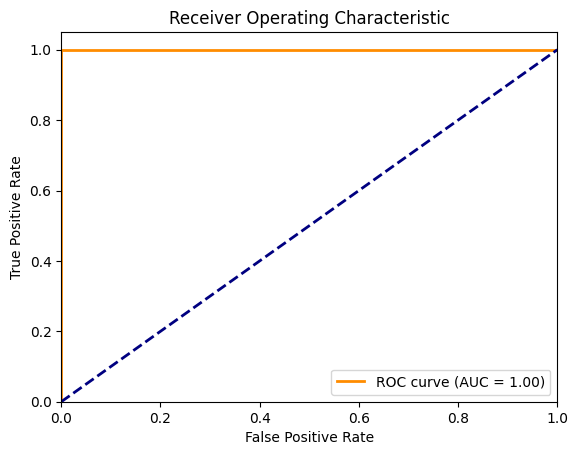

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model = clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC curve and calculate AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
